<a href="https://colab.research.google.com/github/SanjayBhargavKudupudi/DM_Dimentionality_Reduction/blob/main/PCA_SVD_MDS_SOMap/DRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/DATA_MINING_DATASETS/youtubers_df.csv')

# Display the first few rows of the dataframe
print(df.head())

# Summary statistics and info
print(df.describe())
print(df.info())


   Rank       Username           Categories   Suscribers         Country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia                  NaN  162600000.0           India   
4     5  KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   

        Visits      Likes  Comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
3      15600.0      166.0       9.0   
4    3900000.0    12400.0       0.0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://youtube.com/channel/UCk

Pre-Proccesing Data

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Dropping irrelevant columns
df = df.drop(columns=['Username', 'Links'])

# Handling missing values
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
df['Categories'] = imputer.fit_transform(df[['Categories']])

# Encoding categorical variables
categorical_features = ['Country', 'Categories']
categorical_transformer = OneHotEncoder()

# Normalizing numerical features
numerical_features = ['Rank', 'Suscribers', 'Visits', 'Likes', 'Comments']
numerical_transformer = StandardScaler()

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Applying the transformations
df_processed = preprocessor.fit_transform(df)


Applying Dimensionality Reduction Techniques


PCA


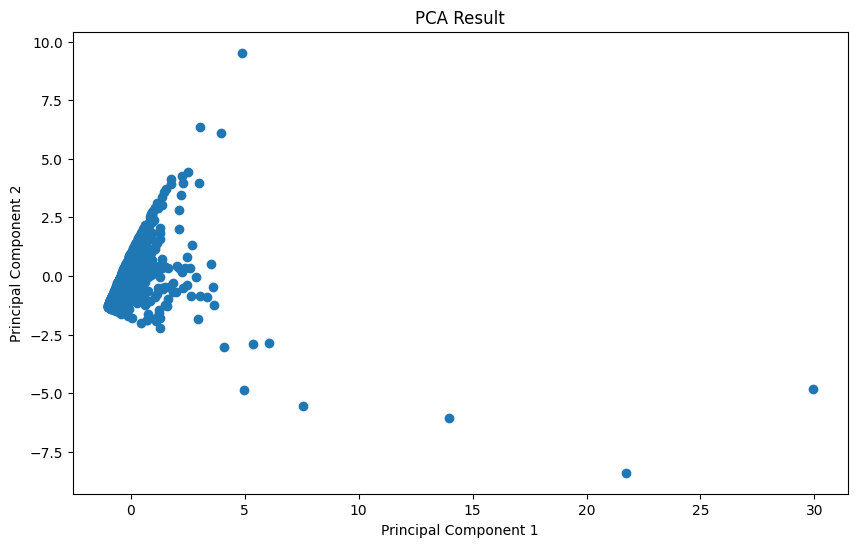

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Converting the sparse matrix to a dense array
df_dense = df_processed.toarray()

# Applying PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_dense)

# Visualizing the result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [7]:
!pip install umap-learn



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 720.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=d5b4d6dc7110c0096dc436712b539683ebace5951ed290719b9143a40217847d
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


SVD


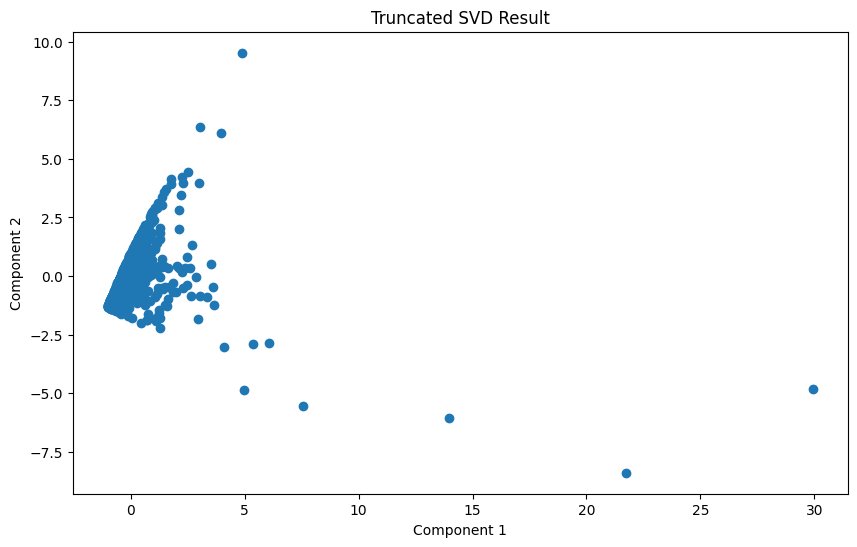

In [8]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Applying TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(df_processed)

# Visualizing the result
plt.figure(figsize=(10, 6))
plt.scatter(svd_result[:, 0], svd_result[:, 1])
plt.title('Truncated SVD Result')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


MDS

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


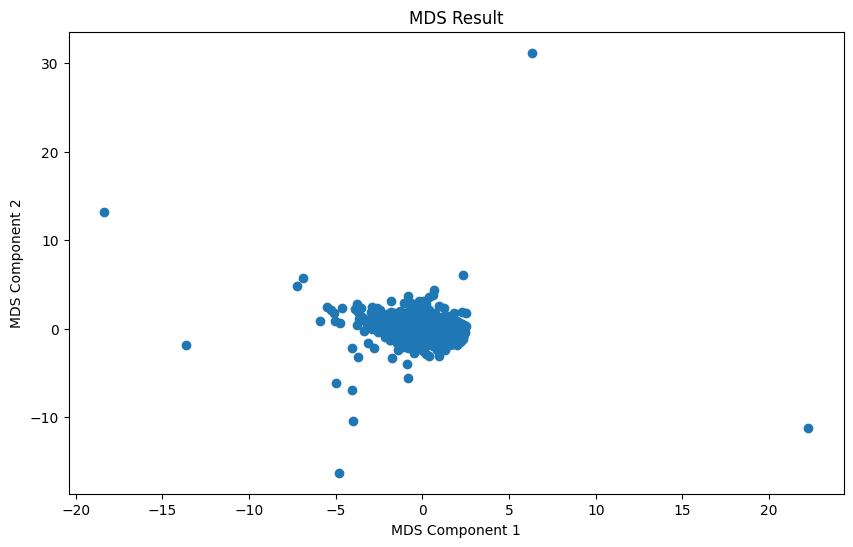

In [9]:
from sklearn.manifold import MDS

# Converting to dense format if necessary
df_dense = df_processed.toarray() if hasattr(df_processed, "toarray") else df_processed

# Applying MDS
mds = MDS(n_components=2)
mds_result = mds.fit_transform(df_dense)

# Visualizing the result
plt.figure(figsize=(10, 6))
plt.scatter(mds_result[:, 0], mds_result[:, 1])
plt.title('MDS Result')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.show()


ISOMAP

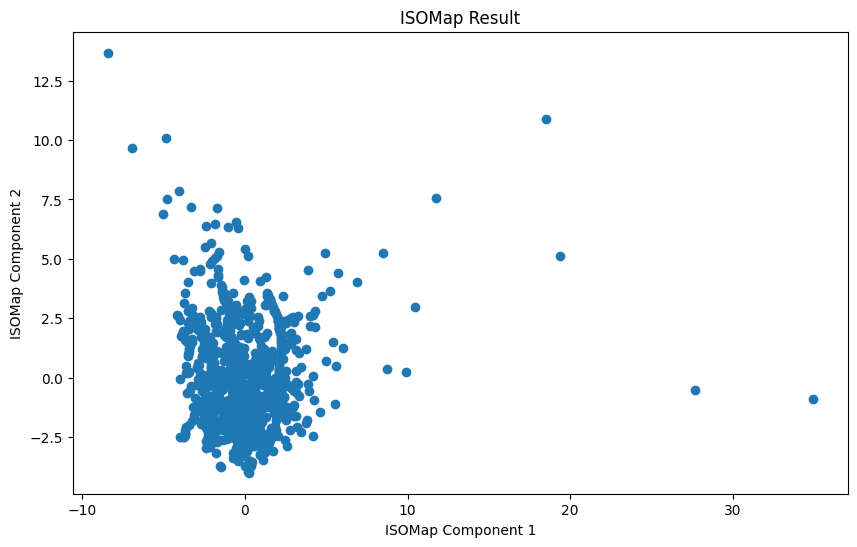

In [10]:
from sklearn.manifold import Isomap

# Applying ISOMap
isomap = Isomap(n_components=2)
isomap_result = isomap.fit_transform(df_dense)

# Visualizing the result
plt.figure(figsize=(10, 6))
plt.scatter(isomap_result[:, 0], isomap_result[:, 1])
plt.title('ISOMap Result')
plt.xlabel('ISOMap Component 1')
plt.ylabel('ISOMap Component 2')
plt.show()


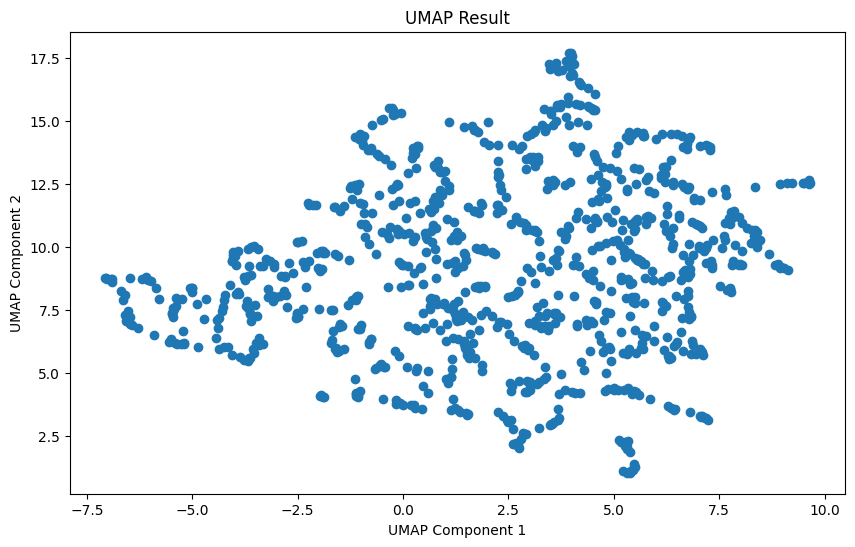

In [11]:

import umap
import matplotlib.pyplot as plt

# Applying UMAP
# Note: You may need to convert df_processed to a dense format if it is sparse
df_dense = df_processed.toarray() if hasattr(df_processed, "toarray") else df_processed
umap_result = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2).fit_transform(df_dense)

# Visualizing the result
plt.figure(figsize=(10, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1])
plt.title('UMAP Result')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()
